In [1]:
import numpy as np
import algorithm_analysis as aa
import cec17.functions as cec
import cec17.functions_info as cec_info
import matplotlib.pyplot as plt
from tabulate import tabulate
import sys
from pathlib import Path
import time

In [2]:
def analyze_function(function_name, dims, population_size=50, runs=10, max_iterations = 1000):
    subdir_name = "analysis_out/" + function_name
    parameters_string = "_D" + str(dims) + '_P' + str(population_size) + '_I' + str(max_iterations)\
                        + '_R' + str(runs)
    timestr = time.strftime("%Y%m%d_%H%M%S")
    Path("./" + subdir_name).mkdir(parents=True, exist_ok=True)
    org_stdout = sys.stdout
    txtfilename = subdir_name + '/' + function_name + '_out_' + parameters_string + timestr + '.txt'
    sys.stdout = f = open(txtfilename, 'w')
    
    print('run cauchy')
    results_c, progress_c, populations_c = aa.analyze_algorithm(function_name, 'cauchy', runs=runs,
                                                                max_iterations=max_iterations,
                                                                population_size=population_size, dims=dims,
                                                                print_out=[f, org_stdout])
        
    print('run normal')
    results_n, progress_n, populations_n = aa.analyze_algorithm(function_name, 'normal', runs=runs,
                                                                max_iterations=max_iterations,
                                                                population_size=population_size, dims=dims,
                                                                print_out=[f, org_stdout])
        
    real_min = cec.get_shift_matrix(cec_info.function_number[function_name], dims) * 0.5
    
    best_individual_c = populations_c[np.argmin(np.linalg.norm(populations_c - real_min, axis=1))]
    best_individual_n = populations_n[np.argmin(np.linalg.norm(populations_n - real_min, axis=1))]
    
    print('\n\nSummary')
    print(tabulate([['population size', population_size],
                    ['runs', runs],
                    ['max_iterations', max_iterations]]
                  ))
    
    print('Results')    
    print(tabulate([['min', np.min(results_c), np.min(results_n)],
                    ['max', np.max(results_c), np.max(results_n)],
                    ['mean', np.mean(results_c), np.mean(results_n)],
                    ['median', np.median(results_c), np.median(results_n)],
                    ['std', np.std(results_c), np.std(results_n)]],
                   headers=['', 'cauchy', 'normal']  
                   ))
    
    print('Population')
    print('target individual', real_min)
    if dims == 2:
        print(tabulate([['average individual', np.mean(populations_c, axis=0), np.mean(populations_n, axis=0)],
                        ['best individual', best_individual_c, best_individual_n],
                        ['average individual error', np.mean(np.linalg.norm(populations_c - real_min, axis=1)),
                                                     np.mean(np.linalg.norm(populations_n - real_min, axis=1))],
                        ['best individual error', np.linalg.norm(best_individual_c - real_min),
                                                  np.linalg.norm(best_individual_n - real_min)]],
                       headers=['', 'cauchy', 'normal']  
                       ))
    else:
        print(tabulate([['average individual error', np.mean(np.linalg.norm(populations_c - real_min, axis=1)),
                                                     np.mean(np.linalg.norm(populations_n - real_min, axis=1))],
                        ['best individual error', np.linalg.norm(best_individual_c - real_min),
                                                  np.linalg.norm(best_individual_n - real_min)]],
                       headers=['', 'cauchy', 'normal']  
                      ))
    
    mean_progress_c = np.mean(progress_c, axis=0)
    mean_progress_n = np.mean(progress_n, axis=0)
    
    plt.plot(mean_progress_c, label='cauchy')
    plt.plot(mean_progress_n, label='normal')    
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Błąd')
    plt.legend()
    plt.savefig(subdir_name + '/' + function_name + '_progress_chart_'+ parameters_string + timestr + '.png')
    
    sys.stdout.close()
    sys.stdout = org_stdout
    f.close()
    np.savetxt(subdir_name + '/' + function_name + '_progress_cauchy_' + parameters_string + timestr + '.txt', mean_progress_c)
    np.savetxt(subdir_name + '/' + function_name + '_progress_normal_' + parameters_string + timestr + '.txt', mean_progress_n)

    with open(txtfilename, 'r') as f:
        print(f.read())

epoch: 1	 result: 0.0022259235466179916	 duration: 10.89s
epoch: 2	 result: 0.054092546012043385	 duration: 10.75s
epoch: 3	 result: 0.1508650598071739	 duration: 10.84s
epoch: 4	 result: 0.0017437369257038426	 duration: 10.80s
epoch: 5	 result: 0.023754613696851834	 duration: 10.67s
epoch: 6	 result: 0.01239921939979638	 duration: 10.62s
epoch: 7	 result: 0.006924563681394602	 duration: 10.73s
epoch: 8	 result: 0.11249389048654734	 duration: 10.71s
epoch: 9	 result: 0.0512226331563852	 duration: 10.74s
epoch: 10	 result: 0.04310984154578534	 duration: 10.70s
epoch: 11	 result: 0.0019872425711469077	 duration: 10.71s
epoch: 12	 result: 0.05100886149760697	 duration: 10.72s
epoch: 13	 result: 0.005467074793244819	 duration: 10.80s
epoch: 14	 result: 0.055719001125225986	 duration: 10.70s
epoch: 15	 result: 0.03966754264088479	 duration: 10.66s
epoch: 16	 result: 0.02820923526726915	 duration: 10.69s
epoch: 17	 result: 0.0496008354086257	 duration: 10.74s
epoch: 18	 result: 0.01391150651

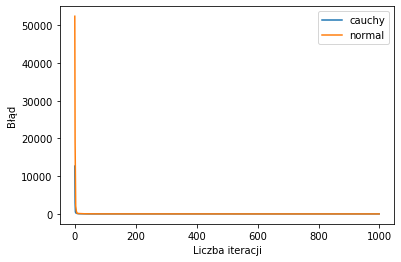

In [3]:
analyze_function('bent_cigar', dims=2, population_size=50, runs=51, max_iterations = 1000)

epoch: 1	 result: 0.01976453983280635	 duration: 14.44s
epoch: 2	 result: 0.019764540060180025	 duration: 13.28s
epoch: 3	 result: 0.01976453997946237	 duration: 13.14s
epoch: 4	 result: 0.019764540073936132	 duration: 13.02s
epoch: 5	 result: 0.01976453984195814	 duration: 11.85s
epoch: 6	 result: 0.019764539836273798	 duration: 12.08s
epoch: 7	 result: 0.019764539834909556	 duration: 12.25s
epoch: 8	 result: 0.01976453985861326	 duration: 12.43s
epoch: 9	 result: 0.01976453983246529	 duration: 12.43s
epoch: 10	 result: 0.019764539830873673	 duration: 13.73s
epoch: 11	 result: 0.019764544320821642	 duration: 12.71s
epoch: 12	 result: 0.019764539909544965	 duration: 12.19s
epoch: 13	 result: 0.019764539889877142	 duration: 12.02s
epoch: 14	 result: 0.019764539871630404	 duration: 12.02s
epoch: 15	 result: 0.01976454097240321	 duration: 11.92s
epoch: 16	 result: 0.01976454013225748	 duration: 11.92s
epoch: 17	 result: 0.019764539954223892	 duration: 12.45s
epoch: 18	 result: 0.019764539

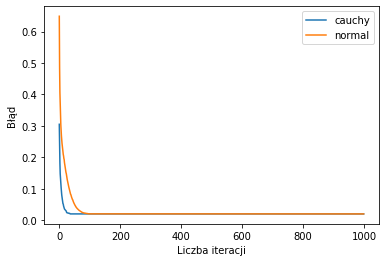

In [4]:
analyze_function('rosenbrock', dims=2, population_size=50, runs=51, max_iterations = 1000)

epoch: 1	 result: 0.0002061812236320293	 duration: 14.71s
epoch: 2	 result: 0.0021290005827268033	 duration: 14.64s
epoch: 3	 result: 0.0004040286021904649	 duration: 14.62s
epoch: 4	 result: 0.00037967210556644204	 duration: 14.72s
epoch: 5	 result: 0.00045859635451961367	 duration: 14.64s
epoch: 6	 result: 4.320466240415044e-05	 duration: 14.62s
epoch: 7	 result: 0.00037872136033456627	 duration: 14.69s
epoch: 8	 result: 0.00016484767257907151	 duration: 14.71s
epoch: 9	 result: 0.00014848470442530015	 duration: 14.65s
epoch: 10	 result: 0.0006553466616310288	 duration: 14.67s
epoch: 11	 result: 0.008680269013950692	 duration: 14.63s
epoch: 12	 result: 9.794515887051602e-05	 duration: 14.73s
epoch: 13	 result: 0.00027546036301373533	 duration: 14.68s
epoch: 14	 result: 0.0005143636909679117	 duration: 14.66s
epoch: 15	 result: 0.0003628327303886181	 duration: 14.72s
epoch: 16	 result: 0.0009609290901266831	 duration: 14.65s
epoch: 17	 result: 0.0015363610314693688	 duration: 14.65s
e

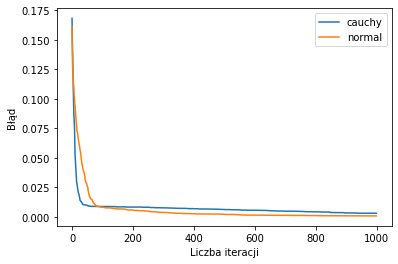

In [5]:
analyze_function('expanded_shaffer_f6', dims=2, population_size=50, runs=51, max_iterations = 1000)

epoch: 1	 result: 0.0006515656375540857	 duration: 19.16s
epoch: 2	 result: 0.00026397552574053407	 duration: 24.92s
epoch: 3	 result: 0.0008009998837223975	 duration: 18.55s
epoch: 4	 result: 0.0025550845796260546	 duration: 18.99s
epoch: 5	 result: 0.0015348666488534946	 duration: 22.47s
epoch: 6	 result: 0.0012015223460366542	 duration: 25.41s
epoch: 7	 result: 0.0024875382835034543	 duration: 22.12s
epoch: 8	 result: 0.00018355931456426333	 duration: 22.06s
epoch: 9	 result: 0.004215187364479789	 duration: 24.92s
epoch: 10	 result: 0.00036830089652539755	 duration: 25.31s
epoch: 11	 result: 0.0016708453417777491	 duration: 22.01s
epoch: 12	 result: 0.003648118011255974	 duration: 25.33s
epoch: 13	 result: 0.00015263408863575023	 duration: 18.60s
epoch: 14	 result: 0.0017606062455115534	 duration: 23.48s
epoch: 15	 result: 0.0003267587259188076	 duration: 24.36s
epoch: 16	 result: 0.00446018070010723	 duration: 25.56s
epoch: 17	 result: 0.0015896741920187196	 duration: 25.30s
epoch:

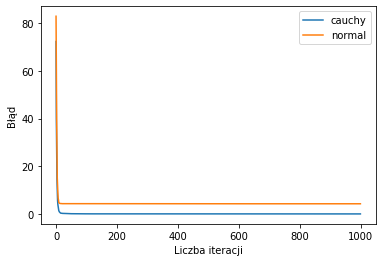

In [6]:
analyze_function('schwefel', dims=2, population_size=50, runs=51, max_iterations = 1000)

epoch: 1	 result: 16091.4947077405	 duration: 54.89s
epoch: 2	 result: 15933.824044077148	 duration: 54.46s
epoch: 3	 result: 9516.961693102066	 duration: 54.48s
epoch: 4	 result: 15714.702836753426	 duration: 54.52s
epoch: 5	 result: 15676.345064679388	 duration: 54.72s
epoch: 6	 result: 16084.106846667803	 duration: 58.81s
epoch: 7	 result: 20587.08678575519	 duration: 57.24s
epoch: 8	 result: 16273.422558193752	 duration: 57.63s
epoch: 9	 result: 19636.5931977347	 duration: 59.17s
epoch: 10	 result: 17953.600476580636	 duration: 58.55s
epoch: 11	 result: 18819.146622764438	 duration: 59.87s
epoch: 12	 result: 16246.46736375974	 duration: 56.90s
epoch: 13	 result: 9860.399952731703	 duration: 54.53s
epoch: 14	 result: 21801.888522139532	 duration: 54.46s
epoch: 15	 result: 13187.166110198174	 duration: 54.49s
epoch: 16	 result: 17129.214138558313	 duration: 54.52s
epoch: 17	 result: 9580.09790706845	 duration: 54.43s
epoch: 18	 result: 20744.764407051556	 duration: 54.55s
epoch: 19	 

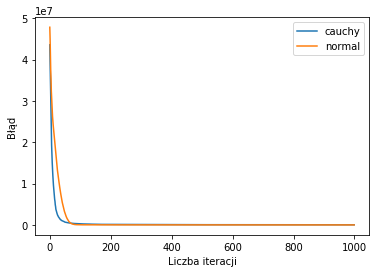

In [7]:
analyze_function('bent_cigar', dims=10, population_size=50, runs=51, max_iterations = 1000)

epoch: 1	 result: 7.765682582460954	 duration: 113.32s
epoch: 2	 result: 7.169327880971366	 duration: 113.66s
epoch: 3	 result: 7.352116120357891	 duration: 113.38s
epoch: 4	 result: 7.045224603092606	 duration: 113.05s
epoch: 5	 result: 5.306418184089694	 duration: 113.66s
epoch: 6	 result: 7.569934521011248	 duration: 112.42s
epoch: 7	 result: 6.426661302413663	 duration: 112.48s
epoch: 8	 result: 7.776641122498461	 duration: 112.78s
epoch: 9	 result: 7.9727955072672785	 duration: 112.74s
epoch: 10	 result: 6.962911444687279	 duration: 112.85s
epoch: 11	 result: 5.380706852490164	 duration: 112.93s
epoch: 12	 result: 6.445880216335638	 duration: 112.53s
epoch: 13	 result: 5.338109478901288	 duration: 112.36s
epoch: 14	 result: 6.952205594500583	 duration: 113.11s
epoch: 15	 result: 7.188212790054536	 duration: 112.64s
epoch: 16	 result: 7.32096794356454	 duration: 112.81s
epoch: 17	 result: 6.441198400519227	 duration: 112.59s
epoch: 18	 result: 5.235760153867659	 duration: 112.38s
e

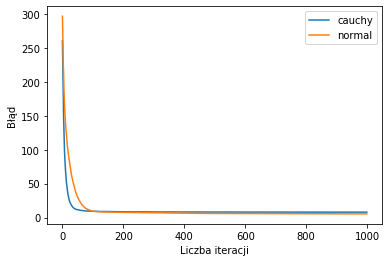

In [8]:
analyze_function('rosenbrock', dims=10, population_size=50, runs=51, max_iterations = 1000)

epoch: 1	 result: 1.992080748604792	 duration: 210.78s
epoch: 2	 result: 1.4884170275813062	 duration: 210.24s
epoch: 3	 result: 1.5040563278619175	 duration: 210.08s
epoch: 4	 result: 2.166194229995142	 duration: 209.47s
epoch: 5	 result: 1.656883988942866	 duration: 209.45s
epoch: 6	 result: 1.862393414793928	 duration: 211.06s
epoch: 7	 result: 1.2951542346868337	 duration: 210.25s
epoch: 8	 result: 1.4651332776654158	 duration: 210.43s
epoch: 9	 result: 1.3273391012841103	 duration: 210.04s
epoch: 10	 result: 2.2601242283835177	 duration: 210.34s
epoch: 11	 result: 1.5521929180642928	 duration: 210.32s
epoch: 12	 result: 1.0731497698408816	 duration: 210.63s
epoch: 13	 result: 1.5819579881328991	 duration: 210.77s
epoch: 14	 result: 1.7493495418063958	 duration: 210.41s
epoch: 15	 result: 1.4717008463999832	 duration: 210.66s
epoch: 16	 result: 1.960021199988546	 duration: 210.21s
epoch: 17	 result: 1.5897969546471131	 duration: 209.38s
epoch: 18	 result: 2.226264314335708	 duratio

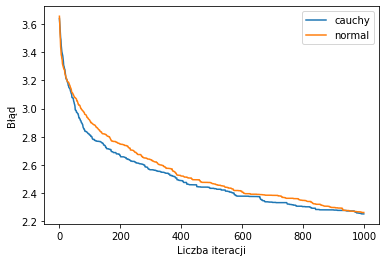

In [9]:
analyze_function('expanded_shaffer_f6', dims=10, population_size=50, runs=51, max_iterations = 1000)

epoch: 1	 result: 323.25358030432244	 duration: 298.27s
epoch: 2	 result: 429.71734654361626	 duration: 289.60s
epoch: 3	 result: 480.34428566656015	 duration: 295.22s
epoch: 4	 result: 150.51115525369437	 duration: 324.04s
epoch: 5	 result: 267.3802586139334	 duration: 291.98s
epoch: 6	 result: 184.67867745865397	 duration: 296.90s
epoch: 7	 result: 243.22873893555243	 duration: 298.91s
epoch: 8	 result: 31.626179275559252	 duration: 311.06s
epoch: 9	 result: 148.33355690685084	 duration: 320.55s
epoch: 10	 result: 388.55944278862717	 duration: 308.24s
epoch: 11	 result: 32.42665274341243	 duration: 304.24s
epoch: 12	 result: 241.34996248745324	 duration: 327.54s
epoch: 13	 result: 84.76404645451169	 duration: 335.03s
epoch: 14	 result: 436.07704764991763	 duration: 303.64s
epoch: 15	 result: 147.29517772488134	 duration: 303.32s
epoch: 16	 result: 140.21288287497782	 duration: 290.45s
epoch: 17	 result: 23.10800293616171	 duration: 317.54s
epoch: 18	 result: 51.713639655383304	 durat

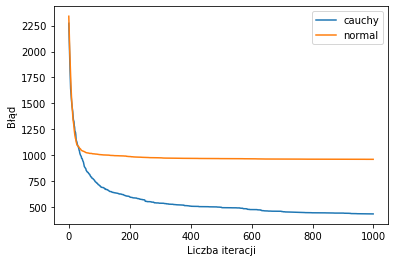

In [10]:
analyze_function('schwefel', dims=10, population_size=50, runs=51, max_iterations = 1000)

epoch: 1	 result: 19765.182082222906	 duration: 32.14s
epoch: 2	 result: 31567.704924439375	 duration: 31.98s
epoch: 3	 result: 24537.971408955702	 duration: 32.74s
epoch: 4	 result: 16521.63165369771	 duration: 32.21s
epoch: 5	 result: 15072.038971531812	 duration: 32.88s
epoch: 6	 result: 13948.355144413748	 duration: 33.32s
epoch: 7	 result: 14907.88206787163	 duration: 32.81s
epoch: 8	 result: 4789.806410789993	 duration: 30.55s
epoch: 9	 result: 19233.581666534017	 duration: 32.15s
epoch: 10	 result: 20197.576471048764	 duration: 30.01s
epoch: 11	 result: 21279.821381302212	 duration: 32.01s
epoch: 12	 result: 16835.68942070335	 duration: 30.65s
epoch: 13	 result: 9858.639427826889	 duration: 31.67s
epoch: 14	 result: 15569.581580077733	 duration: 31.08s
epoch: 15	 result: 12827.565593174231	 duration: 30.10s
epoch: 16	 result: 11995.505227284779	 duration: 29.41s
epoch: 17	 result: 23187.59140621858	 duration: 30.17s
epoch: 18	 result: 27811.757411948976	 duration: 29.46s
epoch: 

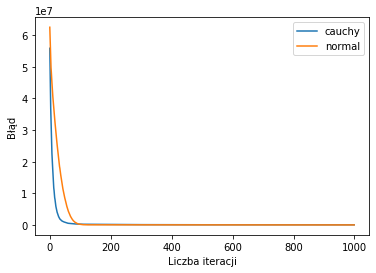

In [11]:
analyze_function('bent_cigar', dims=10, population_size=25, runs=51, max_iterations = 1000)

In [12]:
analyze_function('rosenbrock', dims=10, population_size=25, runs=51, max_iterations = 1000)

epoch: 1	 result: 6.412824889894523	 duration: 60.73s
epoch: 2	 result: 7.526364116198579	 duration: 60.15s
epoch: 3	 result: 7.336193758763557	 duration: 61.18s
epoch: 4	 result: 6.780313332645051	 duration: 61.45s
epoch: 5	 result: 7.7268921343235775	 duration: 61.87s
epoch: 6	 result: 7.568381598482517	 duration: 59.40s
epoch: 7	 result: 7.504428374990766	 duration: 61.23s
epoch: 8	 result: 5.7139618963119005	 duration: 61.41s
epoch: 9	 result: 6.8273948302060035	 duration: 60.87s
epoch: 10	 result: 8.233657235376768	 duration: 58.49s
epoch: 11	 result: 7.266962768210703	 duration: 60.37s
epoch: 12	 result: 5.272253876069328	 duration: 62.77s
epoch: 13	 result: 7.896337042240589	 duration: 63.68s
epoch: 14	 result: 7.148537491880006	 duration: 59.64s
epoch: 15	 result: 9.535946838842221	 duration: 63.97s
epoch: 16	 result: 7.089229159518084	 duration: 63.37s
epoch: 17	 result: 7.144901479453665	 duration: 63.24s
epoch: 18	 result: 5.416612051530308	 duration: 63.03s
epoch: 19	 resul

KeyboardInterrupt: 

In [ ]:
analyze_function('expanded_shaffer_f6', dims=10, population_size=25, runs=51, max_iterations = 1000)

In [ ]:
analyze_function('schwefel', dims=10, population_size=25, runs=51, max_iterations = 1000)